In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Используем стили библиотеки Seaborn

## Пример: данные о рождаемости 

взглянем на находящиеся в открытом доступе данные о рождаемости в США, предоставляемые центрами по контролю заболеваний (Centers for Disease Control, CDC)

In [70]:
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


взглянем на рождения девочек и мальчиков по десятилетиям

In [71]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Сразу же видим, что в каждом десятилетии мальчиков рождается больше, чем девочек

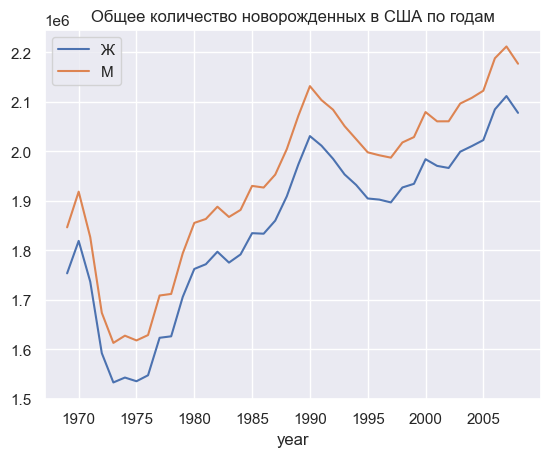

In [72]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.title("Общее количество новорожденных в США по годам")
plt.legend(['Ж', 'М'])

In [73]:
# произведем очистку данных с помощью алгоритма сигма-отсечение (sigma-clipping)
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])  # грубая оценку среднего значения выборки, в котором 0.74 — межквартильный размах Гауссового распределения
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [74]:
# делаем тип столбца 'day' целочисленным
births['day'] = births['day'].astype(int)

C:\Users\Данила\AppData\Local\Temp\ipykernel_15600\2346554198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [79]:
# создаем индекс для даты из года, месяца и дня
births.index = pd.to_datetime(births[['year', 'month', 'day']])
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


Text(0.5, 1.0, 'Среднее количество новорожденных в США в день')

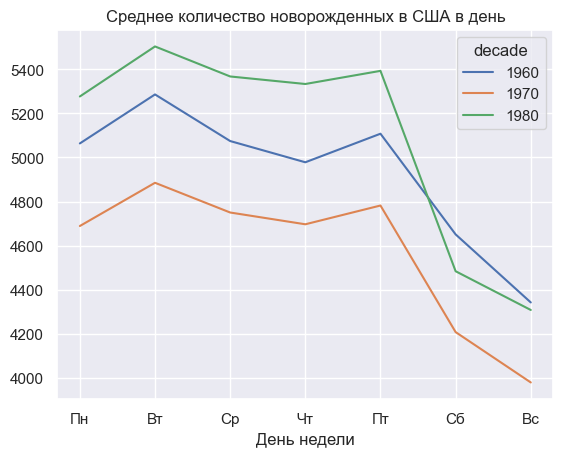

In [88]:
births['day_of_week'] = births.index.dayofweek
births.pivot_table('births', index='day_of_week', columns='decade').plot()
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel("День недели")
plt.title("Среднее количество новорожденных в США в день")

В выходные происходит меньше рождений, чем в будние дни! 1990-е и 2000-е годы отсутствуют на графике, поскольку начиная с 1989 года данные CDC содержат только месяц рождения.

In [102]:
# сгруппируем данные по месяцу и дню
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [103]:
# преобразуем эти месяца и дни в даты путем добавления фиктивного года
births_by_date.index = [pd.datetime(2024, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2024-01-01,4009.225
2024-01-02,4247.400
2024-01-03,4500.900
2024-01-04,4571.350
2024-01-05,4603.625


Text(0.5, 1.0, 'Среднее количество новорожденных в зависимости от месяца')

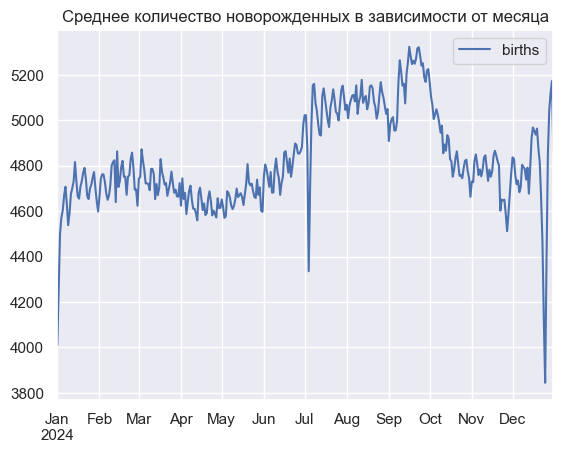

In [105]:
births_by_date.plot()
plt.title("Среднее количество новорожденных в зависимости от месяца")

Наблюдается резкое падение количества рождений в государственные праздники США (например, День независимости, День труда, День
благодарения, Рождество, Новый год)